In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("./resized600_Fresh_all_labeled.bed", sep='\t', header=None)

In [3]:
df1.columns = ['chrom', 'start', 'end', 'id', 'signal', 'label','intensity']

In [4]:
df1

,chrom,start,end,id,signal,label,intensity
0,chr10,3117369,3117969,mESC_Fresh_rep_atac_peak_9006,13.17310,3,7.712389
1,chr10,3164504,3165104,mESC_Fresh_rep_atac_peak_9007,7.78068,6,6.642889
2,chr10,3172174,3172774,mESC_Fresh_rep_atac_peak_9008,7.78068,1,7.187947
3,chr10,3172812,3173412,mESC_Fresh_rep_atac_peak_9009,38.11530,1,11.254194
4,chr10,3180991,3181591,mESC_Fresh_rep_atac_peak_9010,2.42006,1,7.906741
...,...,...,...,...,...,...,...
137918,chrX,167063692,167064292,mESC_Fresh_rep_atac_peak_137919,8.80371,3,13.705830
137919,chrX,167067821,167068421,mESC_Fresh_rep_atac_peak_137920,12.04240,1,9.497028
137920,chrX,167091722,167092322,mESC_Fresh_rep_atac_peak_137921,4.91356,2,8.347293
137921,chrX,167157718,167158318,mESC_Fresh_rep_atac_peak_137922,39.56930,6,9.215316


In [5]:
df1['label'].value_counts()

label
6    69536
1    21962
3    20938
2    12840
4     9150
5     3497
Name: count, dtype: int64

In [6]:
from Bio import SeqIO

In [7]:
sequences = []
for record in SeqIO.parse("./resized600_Fresh_all_labeled.fa", 'fasta'):
    sequences.append([record.id, str(record.seq).upper()])
df2 = pd.DataFrame(sequences, columns=['id', 'sequence'])

In [8]:
df2

,id,sequence
0,mESC_Fresh_rep_atac_peak_9006,GGTCTCCATGTCTCCATGTGTCCTGGAACACTAAAGGACTACTCTC...
1,mESC_Fresh_rep_atac_peak_9007,GTCTGCGTGGAACGGGTCTCTGGTCACAGGTGGGCAAGGAGTTTGA...
2,mESC_Fresh_rep_atac_peak_9008,GTAGAAAGAACATGAAGCCTGTGTCAGCAACATGATGATGCCTGTG...
3,mESC_Fresh_rep_atac_peak_9009,TGTATGCTGTCTTTCAGTATTGTTTTATTATAAGTGCCTTTAAAGA...
4,mESC_Fresh_rep_atac_peak_9010,ACTTTTGAAGACACTCTGGAAGGATGGGAAACACCCTAATCTGGGT...
...,...,...
137918,mESC_Fresh_rep_atac_peak_137919,CTTTTCTAAAGACACAGGTGTTCCTTAGACCTTTGAAACGGACATA...
137919,mESC_Fresh_rep_atac_peak_137920,AAAGTCTGAGACCAGCCTCTCTATACAGTGAGTTCCAGGGTAACCA...
137920,mESC_Fresh_rep_atac_peak_137921,CACTGTGTAGCACAGGCTAGCCTTAAACTCACTATACAGCTTAGTC...
137921,mESC_Fresh_rep_atac_peak_137922,GGTGGATTTTAAATTATCTTTTACTCGGTGACTCATAGAGACCCAT...


In [9]:
df_merged = pd.merge(df1, df2, on='id')
df_merged

,chrom,start,end,id,signal,label,intensity,sequence
0,chr10,3117369,3117969,mESC_Fresh_rep_atac_peak_9006,13.17310,3,7.712389,GGTCTCCATGTCTCCATGTGTCCTGGAACACTAAAGGACTACTCTC...
1,chr10,3164504,3165104,mESC_Fresh_rep_atac_peak_9007,7.78068,6,6.642889,GTCTGCGTGGAACGGGTCTCTGGTCACAGGTGGGCAAGGAGTTTGA...
2,chr10,3172174,3172774,mESC_Fresh_rep_atac_peak_9008,7.78068,1,7.187947,GTAGAAAGAACATGAAGCCTGTGTCAGCAACATGATGATGCCTGTG...
3,chr10,3172812,3173412,mESC_Fresh_rep_atac_peak_9009,38.11530,1,11.254194,TGTATGCTGTCTTTCAGTATTGTTTTATTATAAGTGCCTTTAAAGA...
4,chr10,3180991,3181591,mESC_Fresh_rep_atac_peak_9010,2.42006,1,7.906741,ACTTTTGAAGACACTCTGGAAGGATGGGAAACACCCTAATCTGGGT...
...,...,...,...,...,...,...,...,...
137918,chrX,167063692,167064292,mESC_Fresh_rep_atac_peak_137919,8.80371,3,13.705830,CTTTTCTAAAGACACAGGTGTTCCTTAGACCTTTGAAACGGACATA...
137919,chrX,167067821,167068421,mESC_Fresh_rep_atac_peak_137920,12.04240,1,9.497028,AAAGTCTGAGACCAGCCTCTCTATACAGTGAGTTCCAGGGTAACCA...
137920,chrX,167091722,167092322,mESC_Fresh_rep_atac_peak_137921,4.91356,2,8.347293,CACTGTGTAGCACAGGCTAGCCTTAAACTCACTATACAGCTTAGTC...
137921,chrX,167157718,167158318,mESC_Fresh_rep_atac_peak_137922,39.56930,6,9.215316,GGTGGATTTTAAATTATCTTTTACTCGGTGACTCATAGAGACCCAT...


In [10]:
df = df_merged[~df_merged['sequence'].str.contains('N', case=False)]
df = df[df['label'] != 6]
df['label'] = df['label'] - 1
df = df.reset_index(drop=True)
df

,chrom,start,end,id,signal,label,intensity,sequence
0,chr10,3117369,3117969,mESC_Fresh_rep_atac_peak_9006,13.17310,2,7.712389,GGTCTCCATGTCTCCATGTGTCCTGGAACACTAAAGGACTACTCTC...
1,chr10,3172174,3172774,mESC_Fresh_rep_atac_peak_9008,7.78068,0,7.187947,GTAGAAAGAACATGAAGCCTGTGTCAGCAACATGATGATGCCTGTG...
2,chr10,3172812,3173412,mESC_Fresh_rep_atac_peak_9009,38.11530,0,11.254194,TGTATGCTGTCTTTCAGTATTGTTTTATTATAAGTGCCTTTAAAGA...
3,chr10,3180991,3181591,mESC_Fresh_rep_atac_peak_9010,2.42006,0,7.906741,ACTTTTGAAGACACTCTGGAAGGATGGGAAACACCCTAATCTGGGT...
4,chr10,3191493,3192093,mESC_Fresh_rep_atac_peak_9011,5.83284,3,6.828549,TCTGCTCTAGCAGACTTTCTCATGAATAATGCACTACCCCCCTATT...
...,...,...,...,...,...,...,...,...
68370,chrX,167049561,167050161,mESC_Fresh_rep_atac_peak_137918,6.78967,0,16.478917,TGTACCGGGACACACTTTCCCCATCTGTGGCTAAACTCAGTCAGCC...
68371,chrX,167063692,167064292,mESC_Fresh_rep_atac_peak_137919,8.80371,2,13.705830,CTTTTCTAAAGACACAGGTGTTCCTTAGACCTTTGAAACGGACATA...
68372,chrX,167067821,167068421,mESC_Fresh_rep_atac_peak_137920,12.04240,0,9.497028,AAAGTCTGAGACCAGCCTCTCTATACAGTGAGTTCCAGGGTAACCA...
68373,chrX,167091722,167092322,mESC_Fresh_rep_atac_peak_137921,4.91356,1,8.347293,CACTGTGTAGCACAGGCTAGCCTTAAACTCACTATACAGCTTAGTC...


In [11]:
df['label'] = df['label'].replace(4, -1)
df['label'] = df['label'].replace(0, 4)
df['label'] = df['label'].replace(-1, 0)
df

,chrom,start,end,id,signal,label,intensity,sequence
0,chr10,3117369,3117969,mESC_Fresh_rep_atac_peak_9006,13.17310,2,7.712389,GGTCTCCATGTCTCCATGTGTCCTGGAACACTAAAGGACTACTCTC...
1,chr10,3172174,3172774,mESC_Fresh_rep_atac_peak_9008,7.78068,4,7.187947,GTAGAAAGAACATGAAGCCTGTGTCAGCAACATGATGATGCCTGTG...
2,chr10,3172812,3173412,mESC_Fresh_rep_atac_peak_9009,38.11530,4,11.254194,TGTATGCTGTCTTTCAGTATTGTTTTATTATAAGTGCCTTTAAAGA...
3,chr10,3180991,3181591,mESC_Fresh_rep_atac_peak_9010,2.42006,4,7.906741,ACTTTTGAAGACACTCTGGAAGGATGGGAAACACCCTAATCTGGGT...
4,chr10,3191493,3192093,mESC_Fresh_rep_atac_peak_9011,5.83284,3,6.828549,TCTGCTCTAGCAGACTTTCTCATGAATAATGCACTACCCCCCTATT...
...,...,...,...,...,...,...,...,...
68370,chrX,167049561,167050161,mESC_Fresh_rep_atac_peak_137918,6.78967,4,16.478917,TGTACCGGGACACACTTTCCCCATCTGTGGCTAAACTCAGTCAGCC...
68371,chrX,167063692,167064292,mESC_Fresh_rep_atac_peak_137919,8.80371,2,13.705830,CTTTTCTAAAGACACAGGTGTTCCTTAGACCTTTGAAACGGACATA...
68372,chrX,167067821,167068421,mESC_Fresh_rep_atac_peak_137920,12.04240,4,9.497028,AAAGTCTGAGACCAGCCTCTCTATACAGTGAGTTCCAGGGTAACCA...
68373,chrX,167091722,167092322,mESC_Fresh_rep_atac_peak_137921,4.91356,1,8.347293,CACTGTGTAGCACAGGCTAGCCTTAAACTCACTATACAGCTTAGTC...


In [12]:
df['label'].value_counts()

label
4    21960
2    20933
1    12838
3     9148
0     3496
Name: count, dtype: int64

In [13]:
df['label'] = df['label'].apply(lambda x: 1 if x != 0 else 0)
df['label'].value_counts()

label
1    64879
0     3496
Name: count, dtype: int64

In [14]:
n_classes = df['label'].nunique()

In [15]:
def one_hot_encoding(sequence):
    one_hot_rule = {
        'A': [1, 0, 0, 0],
        'C': [0, 1, 0, 0],
        'G': [0, 0, 1, 0],
        'T': [0, 0, 0, 1]}
    
    one_hot_matrix = []
    
    for char in sequence:
        one_hot_matrix.append(one_hot_rule[char])
    
    return np.array(one_hot_matrix)

In [16]:
df['one_hot'] = df['sequence'].apply(one_hot_encoding)
df['one_hot'] = df['one_hot'].apply(lambda x: x.T)

In [17]:
df['one_hot']

0        [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...
1        [[0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,...
2        [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3        [[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,...
4        [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,...
                               ...                        
68370    [[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,...
68371    [[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,...
68372    [[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,...
68373    [[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,...
68374    [[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,...
Name: one_hot, Length: 68375, dtype: object

In [18]:
df_sample = df.sample(n=20000, random_state=42)

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [20]:
intensity = torch.tensor(df_sample['intensity'].values, dtype=torch.float32)
one_hot = torch.tensor(np.stack(df_sample['one_hot'].values), dtype=torch.float32)
label = torch.tensor(df_sample['label'].values, dtype=torch.long)

In [21]:
print(intensity.shape)
print(one_hot.shape)
print(label.shape)

torch.Size([20000])
torch.Size([20000, 4, 600])
torch.Size([20000])


In [22]:
class SequenceDataset(Dataset):
    def __init__(self, intensities, one_hots, labels):
        self.intensities = intensities
        self.one_hots = one_hots
        self.labels = labels
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        intensity = self.intensities[idx]
        one_hot = self.one_hots[idx]
        label = self.labels[idx]
        return one_hot, intensity, label

In [23]:
train_index, test_index = train_test_split(range(len(df_sample)), test_size=0.2, random_state=42)

train_data = SequenceDataset(intensity[train_index], one_hot[train_index], label[train_index])
test_data = SequenceDataset(intensity[test_index], one_hot[test_index], label[test_index])

In [24]:
print(len(train_data))
print(len(test_data))

16000
4000


In [25]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [26]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, pool_size):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.pool = nn.MaxPool1d(pool_size)

    def forward(self, x):
        x = F.relu(self.conv(x))
        x = self.pool(x)
        return x

class Conv1dCNN(nn.Module):
    def __init__(self, num_classes):
        super(Conv1dCNN, self).__init__()
        self.conv_block1 = ConvBlock(4, 8, 4, 2)
        self.conv_block2 = ConvBlock(8, 16, 4, 2)
        self.conv_block3 = ConvBlock(16, 32, 4, 2)
        self.fc1 = nn.Linear(32 * 75 + 1, 128)
        self.fc2 = nn.Linear(128, num_classes)
        #self.dropout = nn.Dropout(0.5)

    def forward(self, x, intensity):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = x.view(x.size(0), -1)
        x = torch.cat((x, intensity.unsqueeze(1)), dim=1)
        x = F.relu(self.fc1(x))
        #x = self.dropout(x)
        x = self.fc2(x)
        return x

In [27]:
# parameter test

# convolutional layers
conv_block1 = ConvBlock(4, 16, 3, 10)
conv_block2 = ConvBlock(16, 64, 3, 10)
fc1 = nn.Linear(64 * 6 + 1, 128)  # +1 for intensity
fc2 = nn.Linear(128, 4)

x = torch.randn(32, 4, 600)
y = torch.randn(32)

# forward pass
x = conv_block1(x)
x = conv_block2(x)
x = x.view(x.size(0), -1)
x = torch.cat((x, y.unsqueeze(1)), dim=1)
x = F.relu(fc1(x))
x = fc2(x)

print(x.shape)

torch.Size([32, 4])


In [39]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        
        if self.alpha is not None:
            at = self.alpha.gather(0, targets)
            ce_loss = at * ce_loss
        
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

In [68]:
import torch.optim as optim

alpha = torch.tensor([4.75, 0.25])
gamma = 2.0
model = Conv1dCNN(num_classes=n_classes)
criterion = FocalLoss(alpha=alpha, gamma=gamma)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

In [69]:
num_epochs = 20
training_losses = []
testing_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch in train_loader:
        one_hot_batch, intensity_batch, label_batch = batch

        optimizer.zero_grad()
        
        outputs = model(one_hot_batch, intensity_batch)
        
        loss = criterion(outputs, label_batch)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    training_losses.append(epoch_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in test_loader:
            one_hot_batch, intensity_batch, label_batch = batch
            outputs = model(one_hot_batch, intensity_batch)
            loss = criterion(outputs, label_batch)
            val_loss += loss.item()
    
    val_loss /= len(test_loader)
    testing_losses.append(val_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}')

Epoch [1/20], Loss: 0.0804
Epoch [1/20], Validation Loss: 0.0865
Epoch [2/20], Loss: 0.0791
Epoch [2/20], Validation Loss: 0.0852
Epoch [3/20], Loss: 0.0791
Epoch [3/20], Validation Loss: 0.0843
Epoch [4/20], Loss: 0.0788
Epoch [4/20], Validation Loss: 0.0850
Epoch [5/20], Loss: 0.0786
Epoch [5/20], Validation Loss: 0.0844
Epoch [6/20], Loss: 0.0785
Epoch [6/20], Validation Loss: 0.0852
Epoch [7/20], Loss: 0.0779
Epoch [7/20], Validation Loss: 0.0849
Epoch [8/20], Loss: 0.0771
Epoch [8/20], Validation Loss: 0.0878
Epoch [9/20], Loss: 0.0765
Epoch [9/20], Validation Loss: 0.0852
Epoch [10/20], Loss: 0.0753
Epoch [10/20], Validation Loss: 0.0858
Epoch [11/20], Loss: 0.0740
Epoch [11/20], Validation Loss: 0.0870
Epoch [12/20], Loss: 0.0729
Epoch [12/20], Validation Loss: 0.0879
Epoch [13/20], Loss: 0.0711
Epoch [13/20], Validation Loss: 0.0898
Epoch [14/20], Loss: 0.0697
Epoch [14/20], Validation Loss: 0.0952
Epoch [15/20], Loss: 0.0675
Epoch [15/20], Validation Loss: 0.1004
Epoch [16/20]

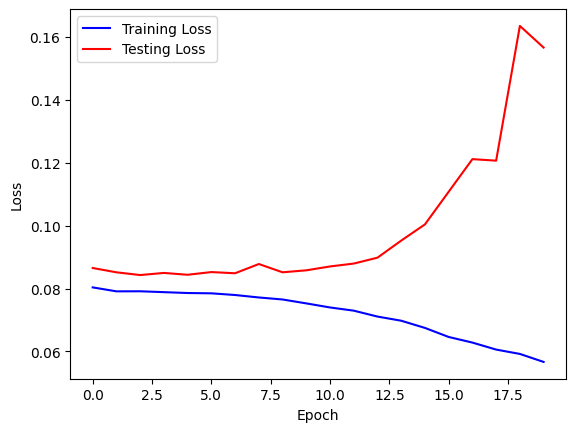

In [70]:
import matplotlib.pyplot as plt

plt.plot(training_losses, 'b', label='Training Loss')
plt.plot(testing_losses, 'r', label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
def evaluate_model(model, test_loader):
    model.eval()
    total_correct = 0
    total_samples = 0
    correct_label_0 = 0
    total_label_0 = 0
    
    with torch.no_grad(): 
        for batch in test_loader:
            one_hot_batch, intensity_batch, label_batch = batch
            
            outputs = model(one_hot_batch, intensity_batch)
            _, predicted = torch.max(outputs, 1)
            
            total_correct += (predicted == label_batch).sum().item()
            total_samples += label_batch.size(0)
            
            is_label_0 = (label_batch == 0)
            correct_label_0 += (predicted[is_label_0] == 0).sum().item()
            total_label_0 += is_label_0.sum().item()
    
    overall_accuracy = total_correct / total_samples
    if total_label_0 == 0:
        label_0_accuracy = 0
    else:
        label_0_accuracy = correct_label_0 / total_label_0
    
    return overall_accuracy, label_0_accuracy, total_correct, total_samples, correct_label_0, total_label_0

overall_accuracy, label_0_accuracy, total_correct, total_samples, correct_label_0, total_label_0 = evaluate_model(model, test_loader)
print(f'Overall Accuracy: {overall_accuracy:.4f}')
print(f'Correct Label: {total_correct:.4f}')
print(f'Total Samples: {total_samples:.4f}')
print(f'Accuracy on label 0: {label_0_accuracy:.4f}')
print(f'Correct 0 Label: {correct_label_0:.4f}')
print(f'Total 0 Sample: {total_label_0:.4f}')

Overall Accuracy: 0.6272
Correct Label: 2509.0000
Total Samples: 4000.0000
Accuracy on label 0: 0.4017
Correct 0 Label: 92.0000
Total 0 Sample: 229.0000
